In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [3]:
bs = 64

In [4]:
path = Path('/data/12306/chars/')

In [29]:
data = ImageDataBunch.from_folder(path,
                                  valid_pct=0.2).normalize(imagenet_stats)

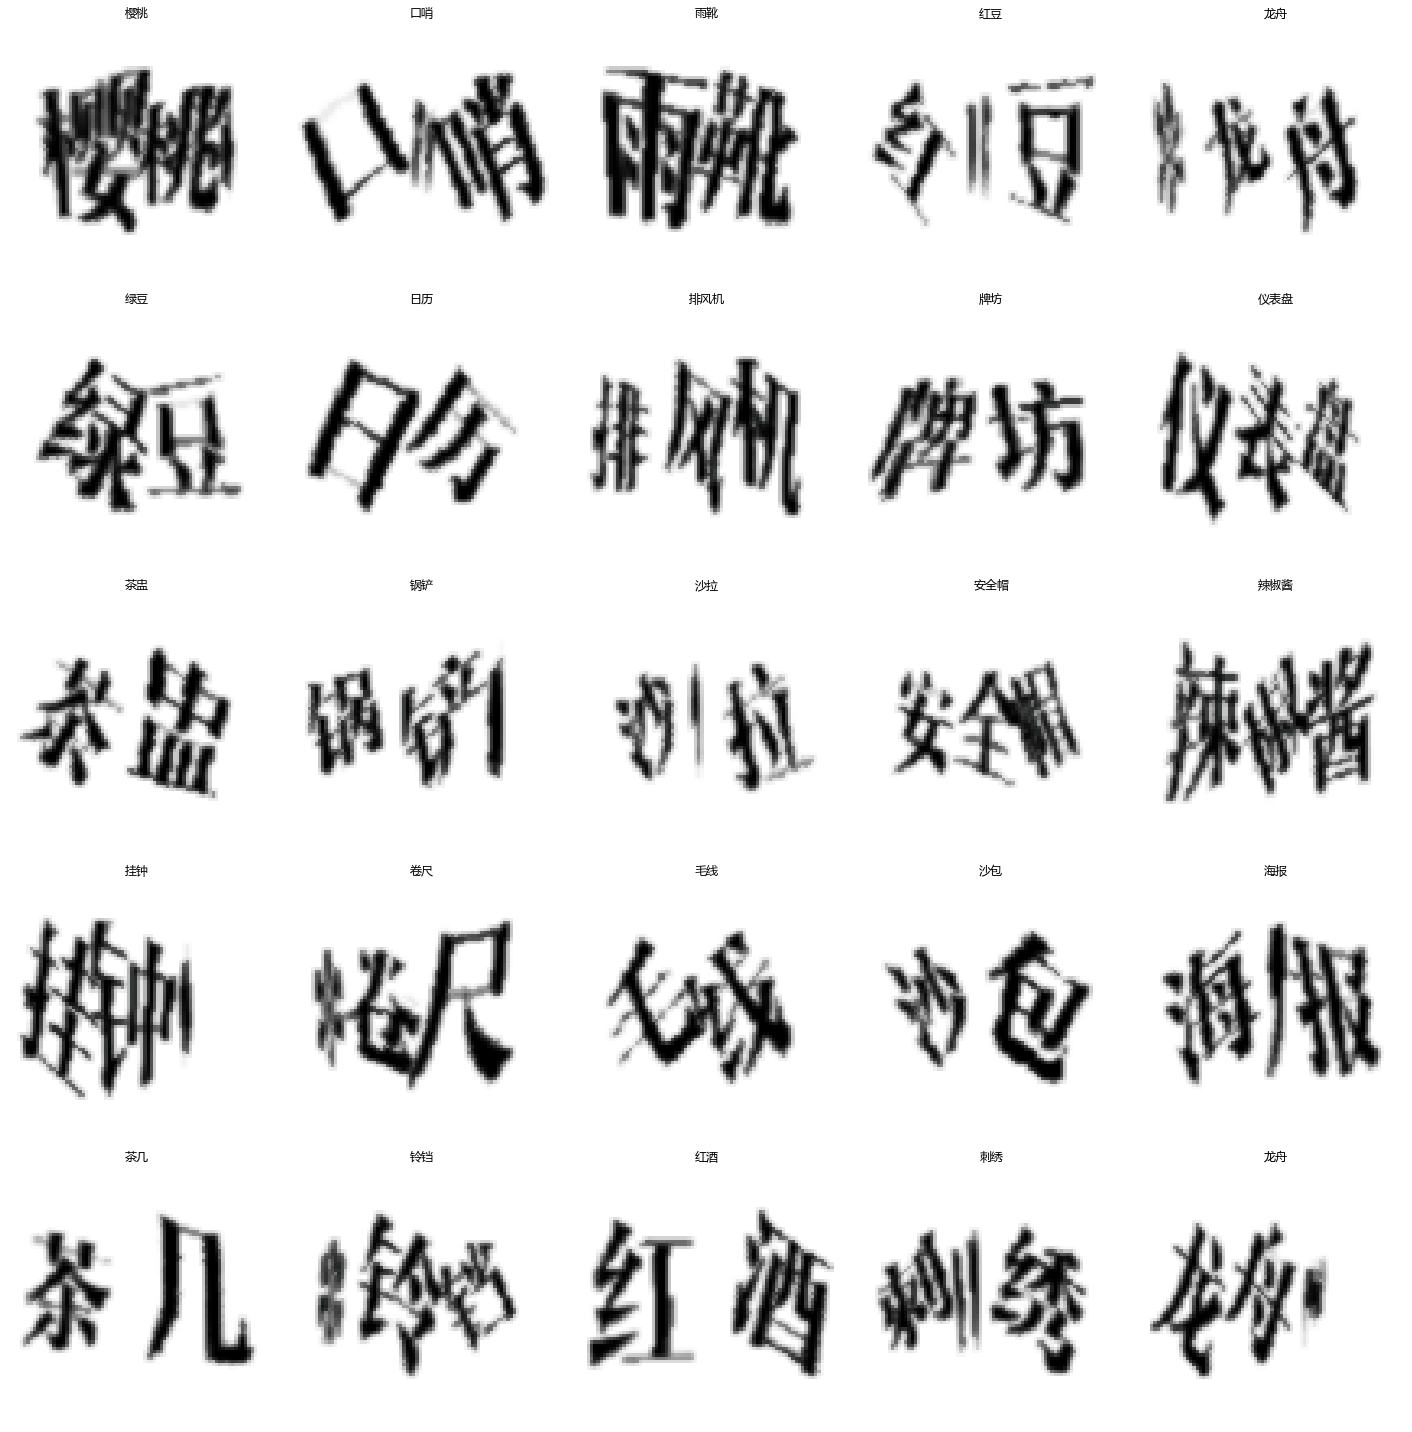

In [30]:
data.show_batch()

In [7]:
learn = cnn_learner(data, models.resnet18,
                    metrics=[error_rate, accuracy])

In [8]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.609461,1.083395,0.308688,0.691312,00:34
1,0.668250,0.382232,0.115500,0.884500,00:34
2,0.463144,0.285418,0.083687,0.916313,00:33


In [9]:
learn.save('char')

In [ ]:
learn.fit_one_cycle(10)

In [ ]:
learn.save('char-1')

In [43]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

In [44]:
len(data.valid_ds) == len(losses) == len(idxs)

True

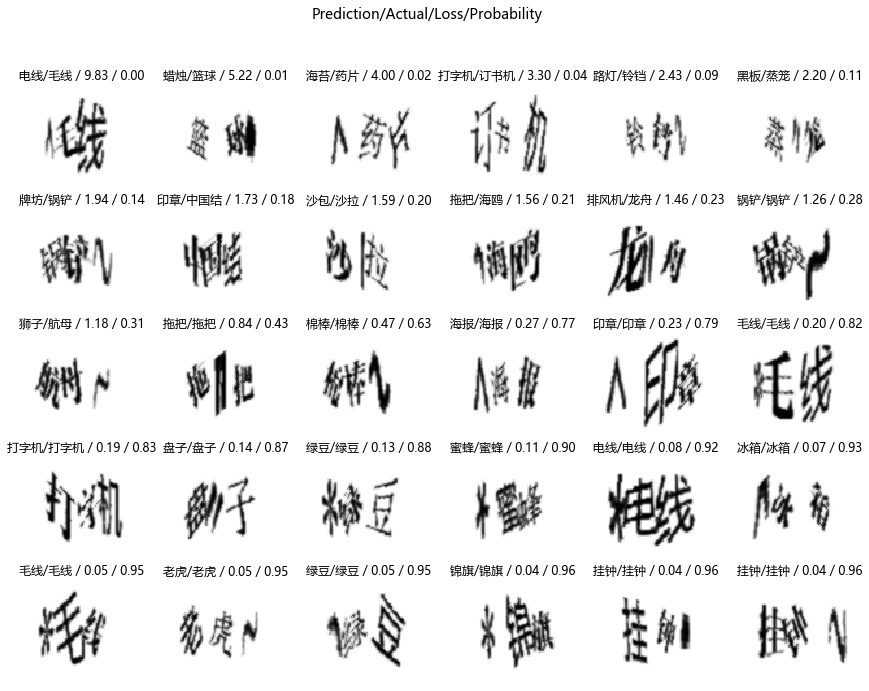

In [45]:
interp.plot_top_losses(30, figsize=(15, 11))

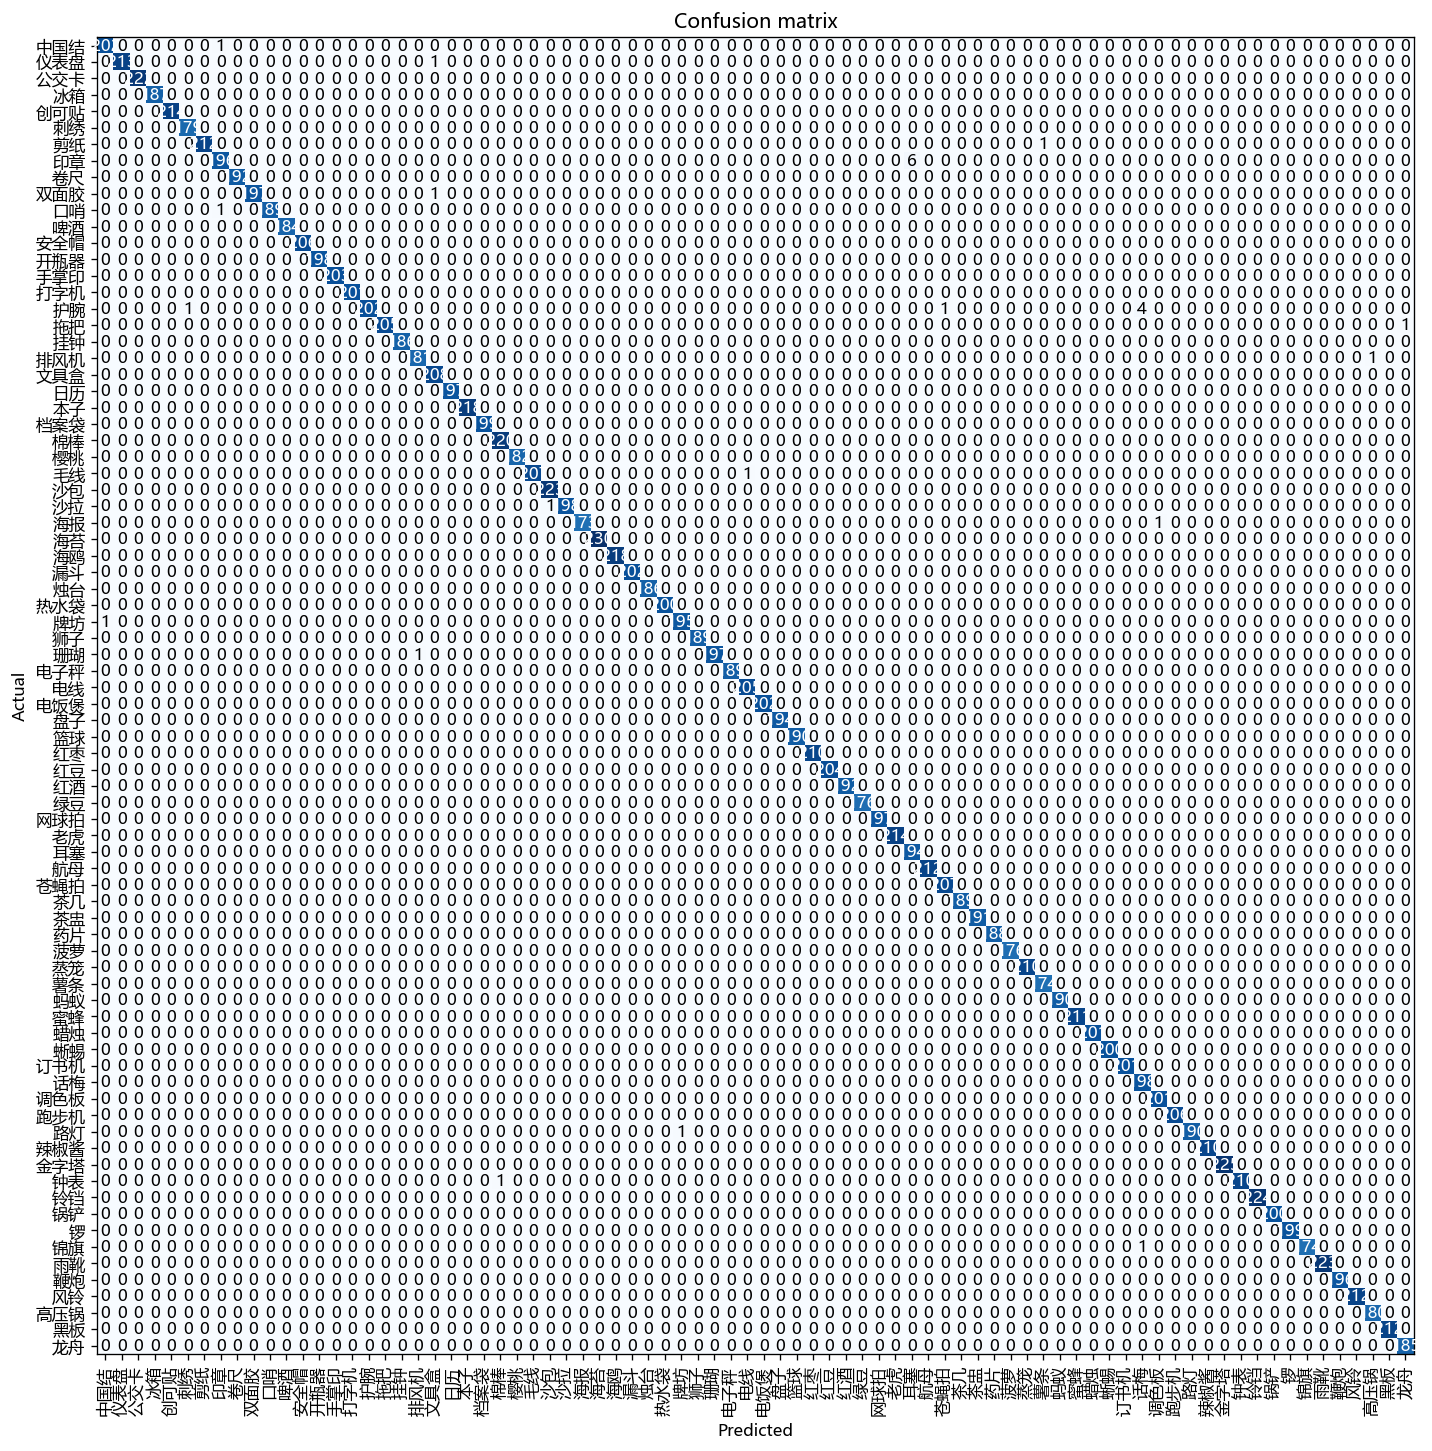

In [37]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=120)

In [46]:
interp.most_confused(min_val=1)

[('中国结', '印章', 1),
 ('毛线', '电线', 1),
 ('沙拉', '沙包', 1),
 ('海鸥', '拖把', 1),
 ('篮球', '蜡烛', 1),
 ('航母', '狮子', 1),
 ('药片', '海苔', 1),
 ('蒸笼', '黑板', 1),
 ('订书机', '打字机', 1),
 ('铃铛', '路灯', 1),
 ('锅铲', '牌坊', 1),
 ('龙舟', '排风机', 1)]

In [39]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


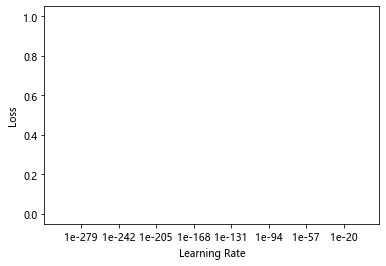

In [40]:
learn.recorder.plot()

In [12]:
learn.unfreeze()

In [31]:
learn.load('char2000-3')

Learner(data=ImageDataBunch;

Train: LabelList (64000 items)
x: ImageList
Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80)
y: CategoryList
手掌印,手掌印,手掌印,手掌印,手掌印
Path: /data/12306/chars;

Valid: LabelList (16000 items)
x: ImageList
Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80)
y: CategoryList
冰箱,红枣,耳塞,辣椒酱,口哨
Path: /data/12306/chars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [48]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.000971,0.001717,0.000562,0.999438,00:50


In [42]:
learn.save('char2000-5')